In [1]:
import pandas as pd
import numpy as np
from km import KMeans
from SVD import Matrix
import matplotlib.pyplot as plt
import math

In [2]:
def load_data(file_path):
    return pd.read_csv(file_path)


In [3]:
file_path = "./EncodedCombined2.csv"  # Replace with your dataset file path
data = load_data(file_path)

avg_rating = load_data("./Movie_Rating.csv")
# Assuming the data matrix is constructed with users as rows and movies as columns
data_matrix = data.iloc[:5000, :]  # Exclude first column (user IDs)
# data_matrix.drop(columns=["Zip-code","Title"],inplace=True)
print(data_matrix)


      UserID  MovieID  Rating  Action  Adventure  Animation  Children's  \
0          1     1193       5       0          0          0           0   
1          1      661       3       0          0          1           1   
2          1      914       3       0          0          0           0   
3          1     3408       4       0          0          0           0   
4          1     2355       5       0          0          1           1   
...      ...      ...     ...     ...        ...        ...         ...   
4995     123      150       5       0          0          0           0   
4996     123        1       3       0          0          1           1   
4997     123     1961       5       0          0          0           0   
4998     123     1962       5       0          0          0           0   
4999     123      260       4       1          1          0           0   

      Comedy  Crime  Documentary  ...  Musical  Mystery  Romance  Sci-Fi  \
0          0      0    

In [4]:
# Convert MovieID and UserID to int16
data_matrix["MovieID"] = data_matrix["MovieID"].astype(np.int16)
data_matrix["UserID"] = data_matrix["UserID"].astype(np.int16)

# Convert other columns to int8

for col in data_matrix.columns:
    if col != "MovieID" and col != "UserID":
        data_matrix[col] = data_matrix[col].astype(np.int8)
print(data_matrix.dtypes)

UserID         int16
MovieID        int16
Rating          int8
Action          int8
Adventure       int8
Animation       int8
Children's      int8
Comedy          int8
Crime           int8
Documentary     int8
Drama           int8
Fantasy         int8
Film-Noir       int8
Horror          int8
Musical         int8
Mystery         int8
Romance         int8
Sci-Fi          int8
Thriller        int8
War             int8
Western         int8
Gender          int8
Age             int8
Occupation      int8
dtype: object


/tmp/ipykernel_6794/416959075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_matrix["MovieID"] = data_matrix["MovieID"].astype(np.int16)
/tmp/ipykernel_6794/416959075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_matrix["UserID"] = data_matrix["UserID"].astype(np.int16)
/tmp/ipykernel_6794/416959075.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [5]:
# Calculate average rating for each genre for each user
genre_columns = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 
                 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [6]:
def get_non_zero_eigenvalues(Sigma):
    # Extract diagonal elements of Sigma
    diagonal_elements = np.diag(Sigma)

    # Filter out values not close to zero
    non_zero_eigenvalues = [eigenvalue for eigenvalue in diagonal_elements if not math.isclose(eigenvalue, 0)]

    return non_zero_eigenvalues


In [7]:
# avgdict = avg_rating.set_index('MovieID')['AvgRating'].to_dict()
# avg_dict = {int(key): float(value)  for key, value in avgdict.items() if value != 'Avg. Rating'}

# A = data_matrix.pivot(index='UserID', columns='MovieID', values='Rating')
# A_mat = pd.DataFrame(A)
# A_watched=A_mat.copy()
# # print(avg_dict)
# A_mat= A_mat.fillna(avg_dict)
# print(A)


In [8]:
user_genre_ratings = data_matrix.groupby('UserID')[genre_columns].mean().reset_index()

# Drop NaN values (if any)
user_genre_ratings.dropna(inplace=True)

# Extract unique user IDs
user_ids = set(user_genre_ratings['UserID'])

print(avg_rating['MovieID'].unique())


avg_rating = avg_rating[avg_rating['MovieID'] != 'Movie ID']

# Convert 'MovieID' column to int16
avg_rating['MovieID'] = avg_rating['MovieID'].astype(np.int16)

# Merge with average ratings dataframe
user_genre_ratings = user_genre_ratings.merge(avg_rating, how='inner', left_on='UserID', right_on='MovieID')
user_genre_ratings.drop('MovieID', axis=1, inplace=True)

# Drop UserID column as it is not needed in the matrix
user_genre_ratings.drop('UserID', axis=1, inplace=True)


# Convert DataFrame to numpy array
user_genre_ratings_array = user_genre_ratings.to_numpy()
# Convert the last column to float
user_genre_ratings_array[:, -1] = user_genre_ratings_array[:, -1].astype(float)

print(user_genre_ratings_array)

# Assuming the data matrix is constructed with users as rows and genres as columns
A = Matrix(user_genre_ratings_array)
U, Sigma, V = A.svd()

# Calculate reduced SVD
non_zero_diag = get_non_zero_eigenvalues(Sigma)
U_red, Sigma_red, V_red = A.reduced_svd(int(non_zero_diag[0]))  # Number of components for SVD 


['1' '2' '3' ... '3951' '3952' 'Movie ID']
[[0.09433962264150944 0.09433962264150944 0.33962264150943394
  0.37735849056603776 0.2641509433962264 0.03773584905660377 0.0
  0.39622641509433965 0.05660377358490566 0.0 0.0 0.2641509433962264 0.0
  0.11320754716981132 0.05660377358490566 0.05660377358490566
  0.03773584905660377 0.0 4.146846413]
 [0.43410852713178294 0.14728682170542637 0.0 0.0 0.1937984496124031
  0.09302325581395349 0.0 0.6124031007751938 0.007751937984496124
  0.007751937984496124 0.015503875968992248 0.0 0.023255813953488372
  0.18604651162790697 0.13178294573643412 0.24031007751937986
  0.11627906976744186 0.023255813953488372 3.201141227]
 [0.2608695652173913 0.13043478260869565 0.0 0.043478260869565216
  0.30434782608695654 0.2608695652173913 0.0 0.5217391304347826 0.0
  0.043478260869565216 0.043478260869565216 0.043478260869565216
  0.043478260869565216 0.043478260869565216 0.043478260869565216
  0.13043478260869565 0.043478260869565216 0.0 2.3625]
 [0.27860696517

In [9]:
np.savetxt('U_red_Kmeans.txt', U_red)
np.savetxt('Sigma_red_Kmeans.txt', Sigma_red)
np.savetxt('V_red_Kmeans.txt', V_red)

In [10]:
U_red = np.loadtxt('U_red_Kmeans.txt')
Sigma_red = np.loadtxt('Sigma_red_Kmeans.txt')
V_red = np.loadtxt('V_red_Kmeans.txt')
print(U_red.shape)
print(Sigma_red.shape)
print(V_red.shape)

(30, 18)
(18, 18)
(19, 18)


In [11]:
def elbow_method(data, max_clusters=31):
    if len(data) < 2:
        print("Error: Insufficient data points for clustering")
        return
    
    max_clusters = min(max_clusters, len(data) - 1)  # Ensure number of clusters is less than the number of data points
    distortions = []
    for i in range(1, max_clusters + 1):
        km = KMeans(i)
        km.fit(data)
        distortions.append(km.get_cost())
    # Plotting the elbow curve
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()


# Assuming your data is in V_red_T
# Perform Elbow Method


sample_points_ids
[3]
the tuples
(0.137452302208976, 0.009331856038107942, -0.009386107824224282, 0.273571950018941, -0.06629873821632674, -0.16160482846759702, -0.25501405777141334, -0.18977145254991043, -0.09133540512348064, 0.021557795520335897, 0.3498497959904209, 0.16694993336081593, 0.11835677506863526, -0.01336069772546621, 0.2780068456973319, -0.4236406285692574, -0.15310581220971028, -0.07952305569479025)
Distance Matrix
[[1.23155117]
 [1.10909579]
 [1.2959117 ]
 [0.        ]
 [1.2629909 ]
 [1.21410558]
 [1.2471627 ]
 [1.27819882]
 [1.04992353]
 [1.0259143 ]
 [0.86890718]
 [1.05861027]
 [1.09337764]
 [1.21710161]
 [0.89459199]
 [1.15167768]
 [1.27960442]
 [1.055476  ]
 [1.09474051]
 [0.90165022]
 [1.25088598]
 [1.20309859]
 [1.18322699]
 [1.00722859]
 [0.86869018]
 [1.08191566]
 [1.20278004]
 [1.05186579]
 [0.91989585]
 [1.21116932]]
closest
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Distance Matrix
[[0.88129307]
 [0.71248305]
 [0.92803199]
 [0.80619744]
 [0

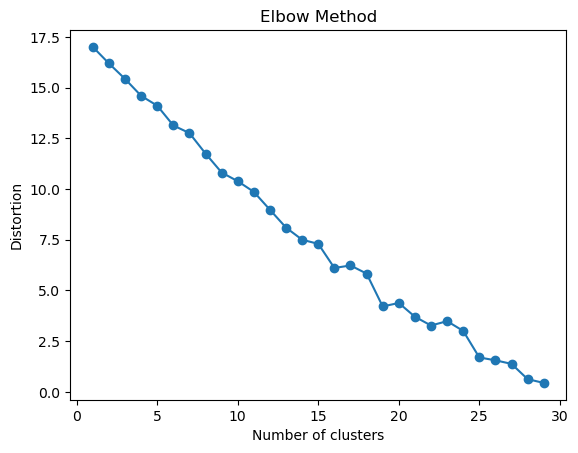

In [12]:
elbow_method(U_red)

In [14]:
km = KMeans(10)
km.fit(U_red)

sample_points_ids
[22, 13, 5, 21, 11, 14, 0, 1, 3, 25]
the tuples
(0.16954858225849018, 0.1057507163462348, 0.10761315238430155, 0.10170597757949605, 0.002525177851624476, -0.3092950420989364, 0.2946361869877305, 0.3541860594046426, -0.10223472363250032, 0.271417753343883, -0.16359057658123322, 0.07907051982630078, 0.08929119132528882, -0.11807127121456155, 0.07520027939187085, -0.18850598831662407, 0.3692029815069849, 0.004091014627044094)
Distance Matrix
[[1.31524727 1.28413074 1.27011139 1.28298042 1.24390089 1.07968305
  0.         1.20602993 1.23155117 1.22753757]
 [1.06357621 1.08358301 1.13460767 1.05057788 0.91618033 0.8721184
  1.20602993 0.         1.10909579 1.00296702]
 [1.22482753 1.30620388 1.1925373  1.18832871 1.21388664 1.02766941
  1.25353599 1.19928947 1.2959117  1.26467524]
 [1.18322699 1.21710161 1.21410558 1.20309859 1.05861027 0.89459199
  1.23155117 1.10909579 0.         1.08191566]
 [1.28006167 1.17863406 1.23054851 1.04228145 0.87698673 1.02464702
  1.24153686

In [17]:
ratings_df = pd.read_csv('./ratings.csv')
movies_df = pd.read_csv('./movies.csv')

def get_ratings_for_user(user_id):
    user_ratings = ratings_df[ratings_df['UserID'] == user_id]
    return dict(zip(user_ratings['MovieID'], user_ratings['Rating']))

def get_genres_for_movie(movie_id):
    movie_row = movies_df[movies_df['MovieID'] == movie_id].iloc[0]
    return movie_row['Genres'].split('|')

def get_title_for_movie(movie_id):
    movie_row = movies_df[movies_df['MovieID'] == movie_id].iloc[0]
    return movie_row['Title']


In [24]:
def recommend_movies(user_id, user_genre_ratings, user_idx, cluster_labels, movies_data):
    # Identify highly rated genres for the user
    high_rated_genres = [genre for genre, rating in user_genre_ratings.items() if rating > 4]

    # Determine the cluster to which the user belongs
    user_cluster = cluster_labels[user_idx[user_id]]

    # Filter users in the same cluster
    cluster_users = [user_id for user_id, cluster in cluster_labels.items() if cluster == user_cluster and user_id != user_id]

    # Aggregate ratings for movies in highly rated genres from users in the same cluster
    movie_ratings = {}
    movie_rating_count = {}
    for cluster_user_id in cluster_users:
        # Get ratings of movies from the user (you need to implement this)
        user_ratings = get_ratings_for_user(cluster_user_id)

        for movie_id, rating in user_ratings.items():
            # Get genre of the movie (you need to implement this)
            movie_genres = get_genres_for_movie(movie_id)

            # Check if the movie belongs to highly rated genres
            if any(genre in high_rated_genres for genre in movie_genres):
                if movie_id not in movie_ratings:
                    movie_ratings[movie_id] = 0
                    movie_rating_count[movie_id] = 0
                
                # Aggregate ratings
                movie_ratings[movie_id] += rating
                movie_rating_count[movie_id] += 1

    # Calculate average ratings
    avg_ratings = {}
    for movie_id, rating_sum in movie_ratings.items():
        if movie_id in movie_rating_count and movie_rating_count[movie_id] > 0:
            avg_ratings[movie_id] = rating_sum / movie_rating_count[movie_id]

    # Sort movies by average rating in descending order
    sorted_movies = sorted(avg_ratings.items(), key=lambda x: x[1], reverse=True)

    # Recommend top movies
    recommended_movies = []
    for movie_id, avg_rating in sorted_movies[:5]:
        # Get title of the movie (you need to implement this)
        movie_title = get_title_for_movie(movie_id)
        recommended_movies.append({"MovieID": movie_id, "Title": movie_title, "AverageRating": avg_rating})

    return recommended_movies

In [25]:
cluster_labels = km.get_pointCluster()

movies_data = pd.read_csv("movies.csv")

user_index = {user_id: idx for idx, user_id in enumerate(user_ids)}

print(f"Cluster Labels: {cluster_labels}")
print(f"User_Index : {user_index}")
# User ID for which we want to recommend movies
user_id = 12  # Replace with the desired user ID

user_genre_ratings = pd.DataFrame(user_genre_ratings)
user_idx = {user_id: idx for idx, user_id in enumerate(data_matrix['UserID'])}


# Recommend movies for the user
recommended_movies = recommend_movies(user_id, user_genre_ratings, user_idx, cluster_labels, movies_data)
print("Recommended movies for User", user_id)

print("Recommended movies:", recommended_movies)
# Display top 5 recommended movies
for movie in recommended_movies[:5]:
    if len(movie) >= 4:
        print(f"Title : {movie[2]} , MovieID : {movie[0]} , Rating : {movie[1]} , Genres : {movie[3]}")



Cluster Labels: {0: 6, 1: 7, 2: 5, 3: 8, 4: 4, 5: 2, 6: 5, 7: 4, 8: 5, 9: 5, 10: 5, 11: 4, 12: 5, 13: 1, 14: 5, 15: 7, 16: 5, 17: 5, 18: 5, 19: 5, 20: 5, 21: 3, 22: 0, 23: 7, 24: 5, 25: 9, 26: 7, 27: 5, 28: 8, 29: 4}
User_Index : {1: 0, 2: 1, 12: 2, 15: 3, 17: 4, 18: 5, 19: 6, 24: 7, 28: 8, 33: 9, 39: 10, 42: 11, 44: 12, 47: 13, 48: 14, 49: 15, 54: 16, 58: 17, 59: 18, 62: 19, 80: 20, 88: 21, 89: 22, 96: 23, 99: 24, 102: 25, 104: 26, 107: 27, 109: 28, 120: 29, 123: 30}


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().